In [ ]:
# from sklearn.datasets import load_digits
# from matplotlib import pyplot as plt

# digits = load_digits()
# %matplotlib

# fig = plt.figure(figsize=(6, 6))

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 파이썬에서 자주사용하는 대표적인 머신러닝 라이브러리 모듈 -> 실습예제 다양, 머신러닝 모델

# import sklearn
# sklearn.datasets.load_digits()

from sklearn.datasets import load_digits # 손글씨 형태의 샘플링 이미지 데이터 세트
digits = load_digits()

print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [3]:
digits["data"] # 각 이미지를 숫자화한 데이터

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits["target"] # 각 이미지에 대한 정답

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


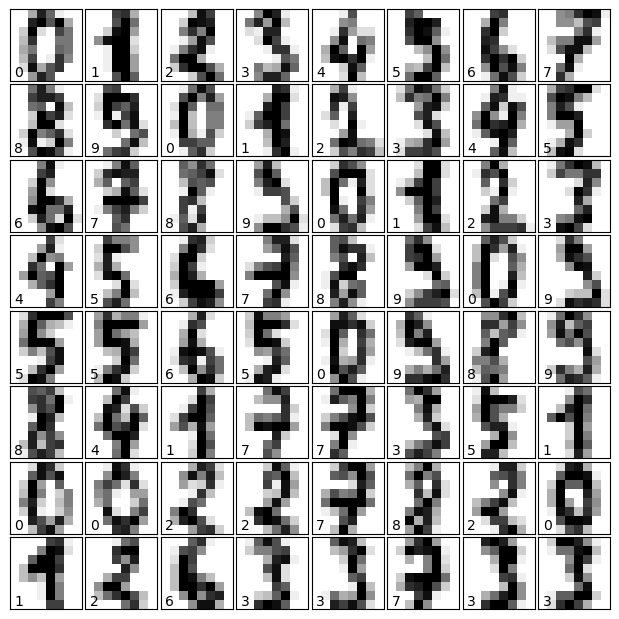

In [6]:
from matplotlib import pyplot as plt # 파이썬에서 그림(그래프, 이미지)을 그리게 해주는 라이브러리 모듈
# 해당 라이브러리를 통해서 그려진 그림을 주피터노트북 > 셀에 바로 표기될 수 있도록 작성하는 코드
%matplotlib inline

fig = plt.figure(figsize=(6, 6)) # 앞으로 그릴 그림의 전체사이즈 정의한 값 (6, 6인치)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64) :
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation="nearest")
    ax.text(0, 7, str(digits.target[i]))

plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target)

In [9]:
from sklearn.naive_bayes import GaussianNB

OneOfNavieBasianModels = GaussianNB()

In [10]:
OneOfNavieBasianModels.fit(X_train, Y_train)

GaussianNB()

In [11]:
predicted = OneOfNavieBasianModels.predict(X_test)

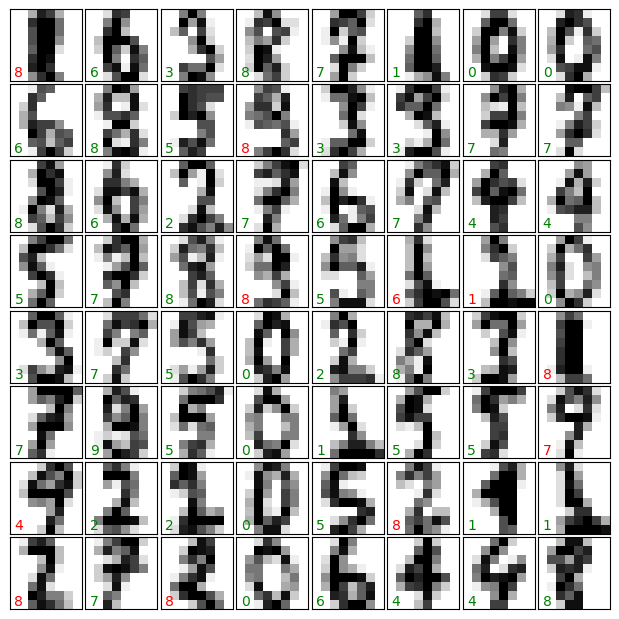

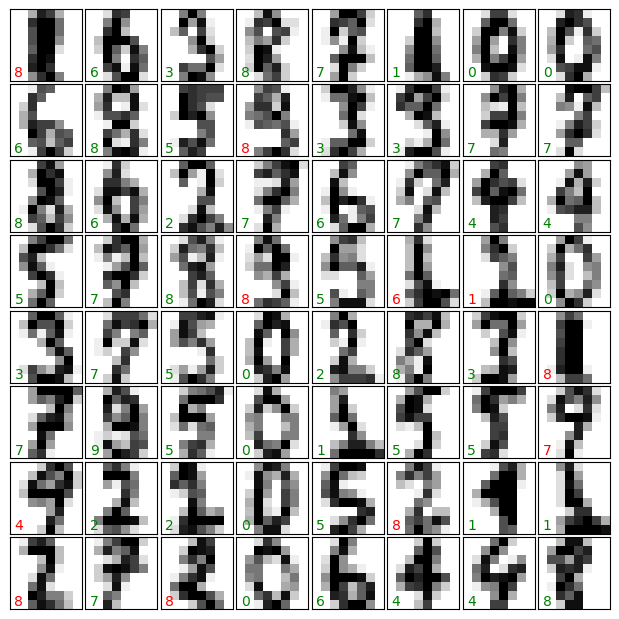

In [14]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    
    ax.imshow(X_test.reshape(-1, 8, 8)[i], 
              cmap=plt.cm.binary, interpolation="nearest")

    if predicted[i] == Y_test[i]:
        ax.text(0, 7, str(predicted[i]), color="green")
    else:
        ax.text(0, 7, str(predicted[i]), color="red")

plt.show()

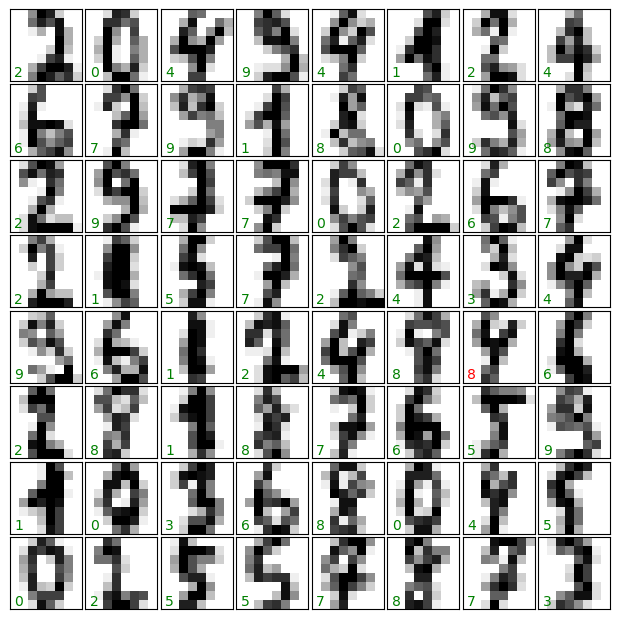

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

# 데이터 불러오기
digits = datasets.load_digits()

# reshape (샘플 수, 64)
X = digits.images.reshape(len(digits.images), -1)
Y = digits.target

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0, stratify=Y
)

# 모델 생성 및 학습
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)

# 예측
predicted = clf.predict(X_test)

# 시각화
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                    hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i],
              cmap=plt.cm.binary, interpolation="nearest")

    if predicted[i] == y_test[i]:
        ax.text(0, 7, str(predicted[i]), color="green")
    else:
        ax.text(0, 7, str(predicted[i]), color="red")

plt.show()
